# 서브플롯

- Matplotlib를 사용하여 하나의 그래픽 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다.

#01. 필요한 패키지 및 샘플 데이터 준비

In [1]:
import numpy as np
from pandas import DataFrame, read_excel
from matplotlib import pyplot as plt

2) 데이터 가져오기

- 데이터 출처 : KOSIS 국가통계포털

- 데이터 프레임 생성

In [2]:
df = read_excel("http://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


3) 그래프에 대한 전역 환경 설정

###### Pyplot 객체의 한글 폰트, 글자크기, 그래픽 사이즈를 설정한다. 이 코드가 다시 실행되기 전까지 모든 그래프 출력에 대해 적용된다.

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

#02. 서브플롯 영역 나누기
1) 2행 3열을 갖는 서브플롯 영역 생성하기

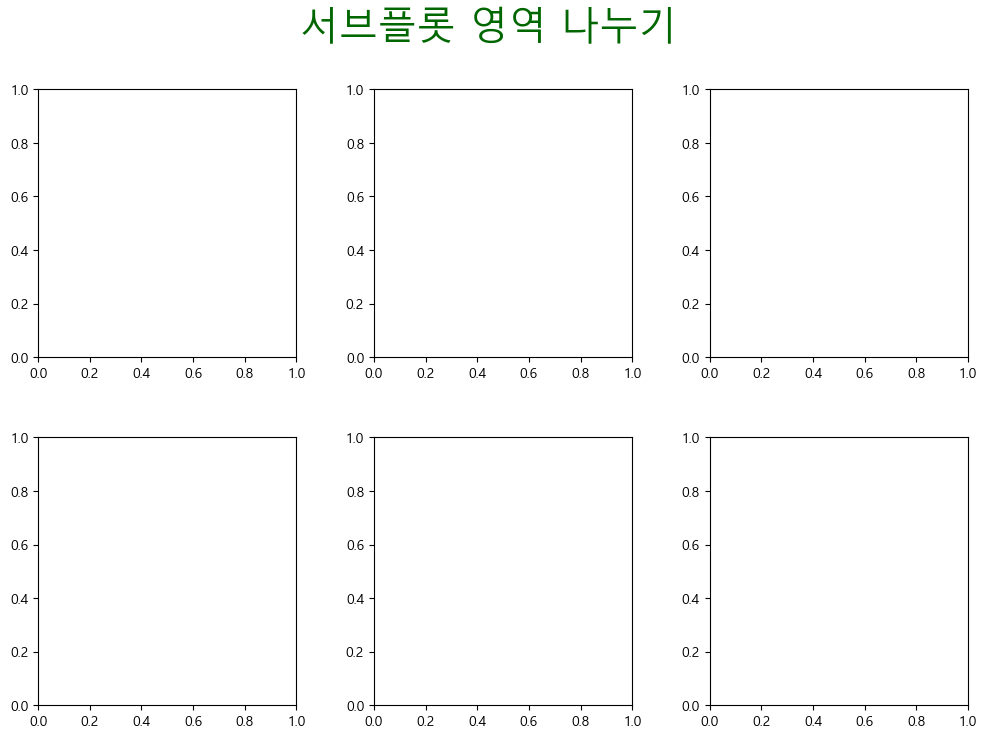

In [12]:
# 서브플롯 생성--->2행 3열
# -> fig 객체: 그래픽 처리 기능을 제공
# -> ax객체: 분할된 각 그래프 영역(리스트)
fig, ax = plt.subplots(2, 3)

# 전체 제목
fig.suptitle('서브플롯 영역 나누기', fontsize=28, color='#006600')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()
plt.close()

#03. 서브플롯에 그래프 그리기

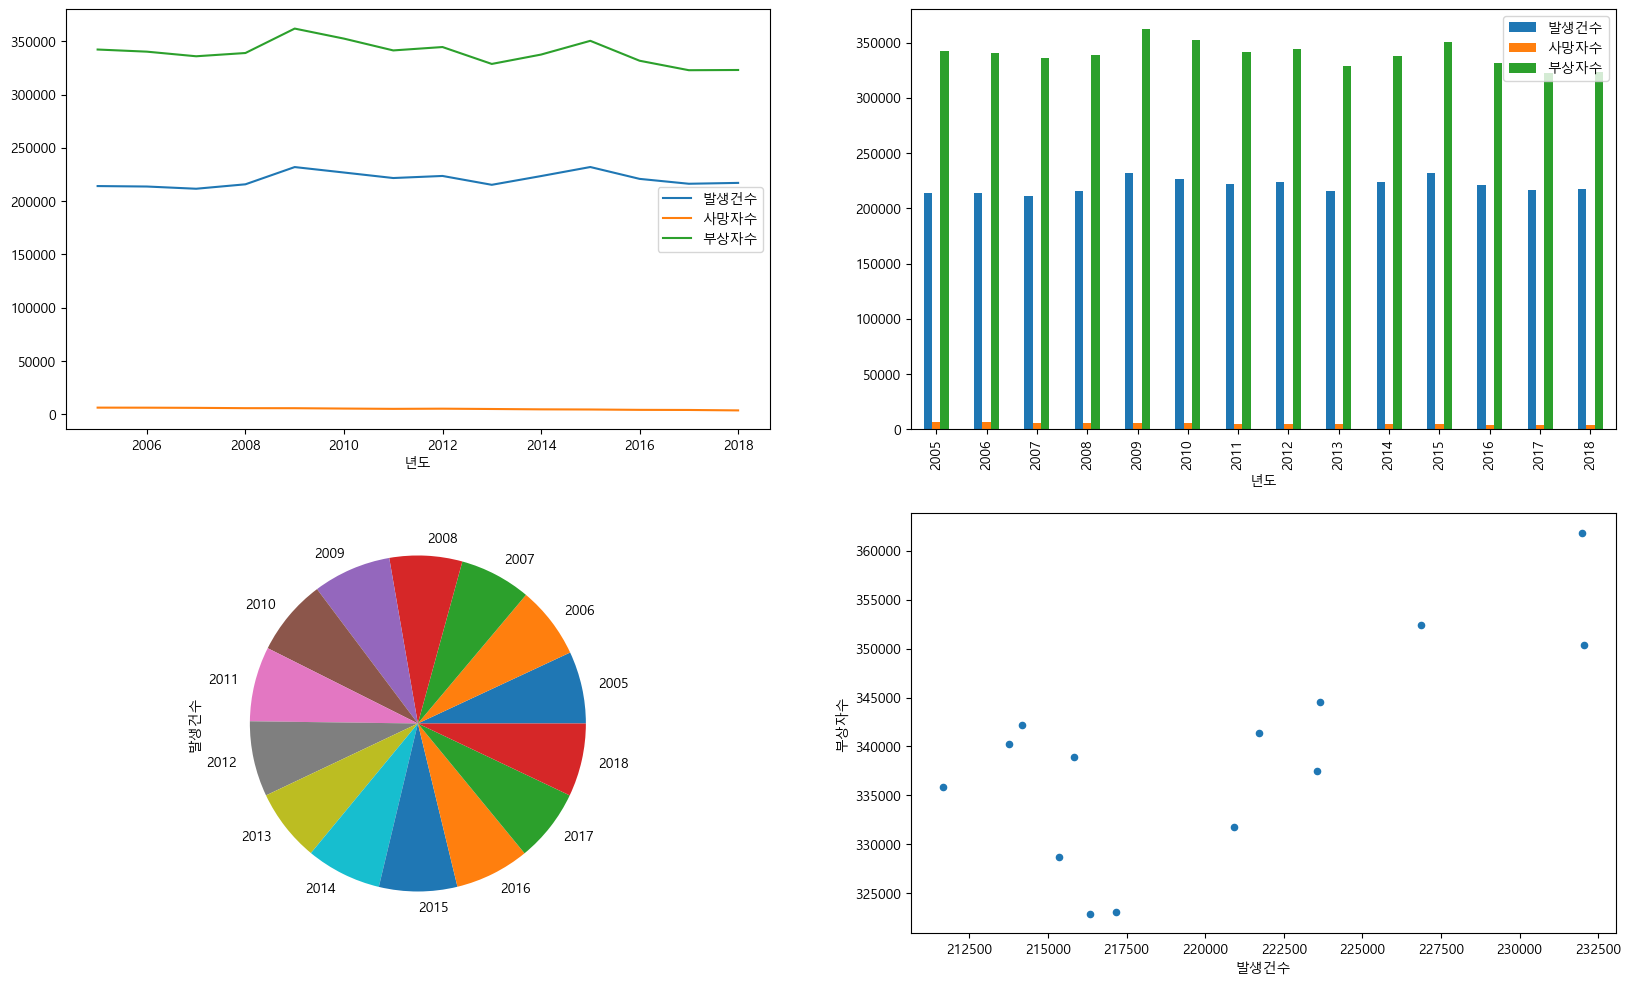

In [13]:
# 2행 2열의 영역을 생성한다. 
#-> ax에 반환되는 객체는 서브플롯의 행,열에 대한 n차원 리스트이다
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
# figsize 파라미터는 그래픽의 크기(위의 설정보다 우선)

# 데이터프레임을 기반으로 각 영역에 그래프를 종류별로 표시
# ax각각 그래프가 나타날 영역에 대한 설정
df.plot(ax=ax[0][0])                                     # 선
df.plot.bar(ax=ax[0][1])                                  # 막대
df['발생건수'].plot.pie(ax=ax[1][0])                       # 파이
df.plot.scatter(x='발생건수', y='부상자수', ax=ax[1][1])    # 산점도

# 그래프 출력하기
plt.show()
plt.close()

#04. 서브플롯 영역에 옵션 지정하기

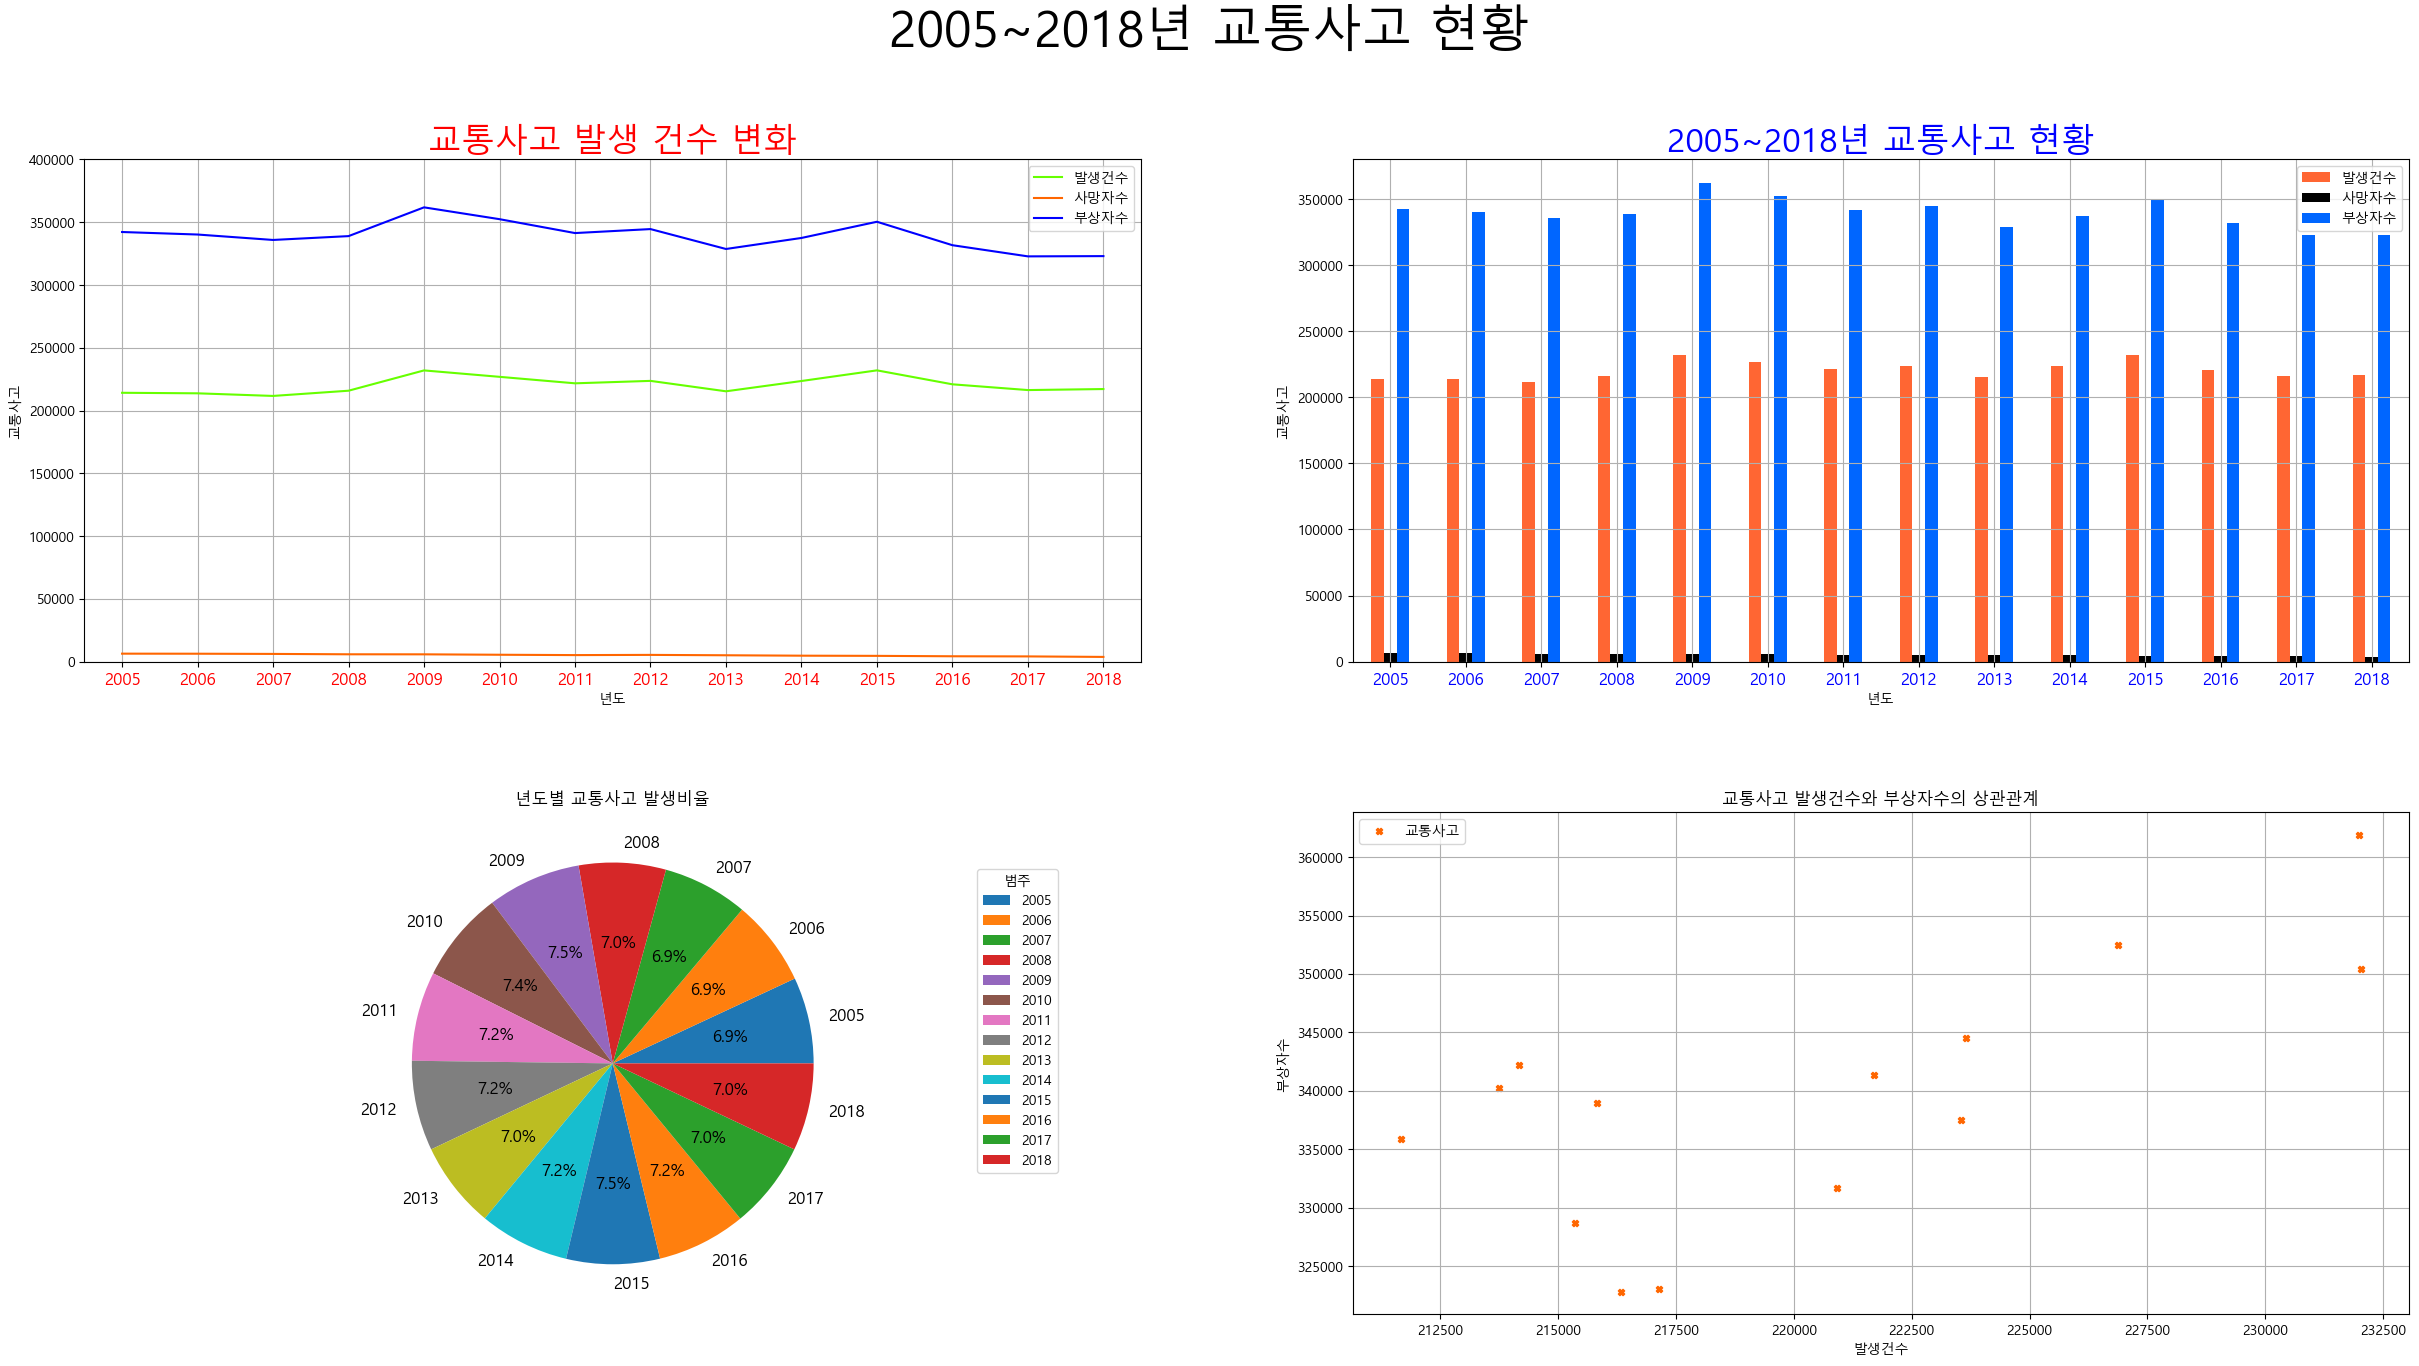

In [9]:
#--------------------------------------------------------------
# 2행 2열의 영역을 생성한다
#--------------------------------------------------------------
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 15))
# 2차원 리스트 안에 값을 표시할경우 [[a1, a2]]와 같은 형태로
# 2행 2열의 경우 (ax1, ax2)가 첫번째 행이고 (ax3, ax4)가 두번째행
# 그와중에 ax1은 1-1을 표시해야하기때문에 괄호가 한번 더 들어간다.

# 전체 제목
fig.suptitle('2005~2018년 교통사고 현황', fontsize=36, color='#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.3)

#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 년도별 교통사고에 대한 선 그래프
#--------------------------------------------------------------
df.plot(ax=ax1, color=['#66ff00', '#ff6600', '#0000ff'])

# 배경 격자 표시
ax1.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax1.set(xlabel='년도', ylabel='교통사고')

# plt을 직접 사용할 경우 xticks(x축좌표, 표시할_텍스트) 형식으로 지정하지만
# 서브플롯은 x축의 좌표와 표시할 텍스트를 나누어서 처리한다.
# -> x축의 좌표만 지정함
start = min(df.index)
end = max(df.index)

ax1.set_xticks(list(range(start, end+1)))

# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax1.set_xticklabels(df.index, fontsize=12, color='#ff0000')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0, 400000])

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
#--------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
df.plot.bar(ax=ax2, rot=0, color=['#ff6633', '#000000', '#0066ff'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text("2005~2018년 교통사고 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0, len(df.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax2.set_xticklabels(df.index, fontsize=12, color='#0000ff')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax2.set(xlabel='년도', ylabel='교통사고')

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 파이 그래프
#--------------------------------------------------------------
# 파이그래프
df['발생건수'].plot.pie(ax=ax3, labels=df.index, autopct="%0.1f%%", 
                        textprops={'color':"#000000", 'fontsize': 12})

# 그래프 제목
ax3.title.set_text("년도별 교통사고 발생비율")

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=df.index, title='범주', bbox_to_anchor=(1.4, 0.9))

#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 산점도 그래프
#--------------------------------------------------------------
# 산점도 그래프
df.plot.scatter(ax=ax4, x='발생건수', y='부상자수', color='#ff6600', marker='X', label='교통사고')

# 그래프 제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 배경 격자
ax4.grid()

# x축,y축 라벨
ax4.set(xlabel='발생건수', ylabel='부상자수')

#--------------------------------------------------------------
# 그래프 출력하기
#--------------------------------------------------------------
plt.show()
plt.close()

#05. 두 개의 y축을 갖는 그래프
1) 샘플 데이터 만들기

In [10]:
x = list(range(0, 10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

첫번째 y축 데이터

In [11]:
y1 = list(range(0, 10, 1))
y1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

두번째 y축 데이터

In [14]:
y2 = list(np.arange(0, 5, 0.5))
y2

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

2) 기본 그래프 구현

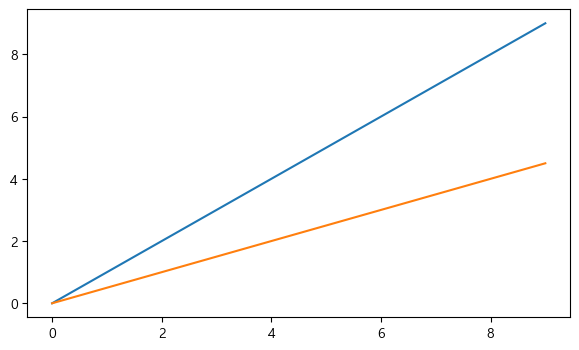

In [15]:
plt.rcParams['figure.figsize'] = (7,4)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()
plt.close()

2) 서브플롯으로 2개의 y축을 갖는 그래프 구현

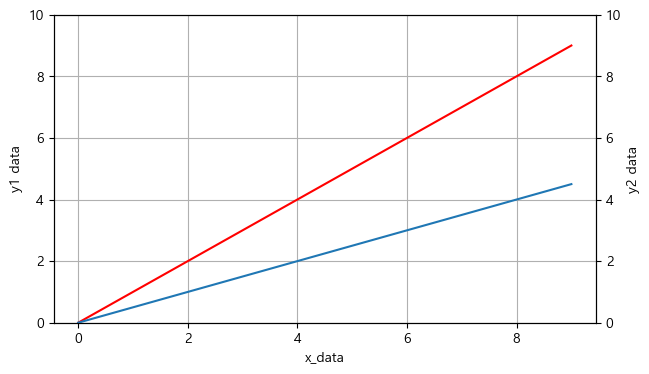

In [21]:
# 그래프 시작
fig, ax1 = plt.subplots(1,1, figsize=(7,4))

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x, y1, color='red')
ax1.set_xlabel("x_data")
ax1.set_ylabel("y1 data")
ax1.grid()
ax1.set_ylim([0,10]) # y축 영역 설정

# ax2에 그래프 그리기
ax2.plot(x, y2)
ax2.set_ylabel("y2 data")
ax2.set_ylim([0,10])
plt.show()
plt.close()

06. (예제) 교통사고 발생건수와 사망자수 변화 시각화하기

###### 우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부 개정령(안)을 개정한 이후 꾸준히 교통사고 안전기준을 강화해왔다. 이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는 지 알아보자.

- 그래프 그리기

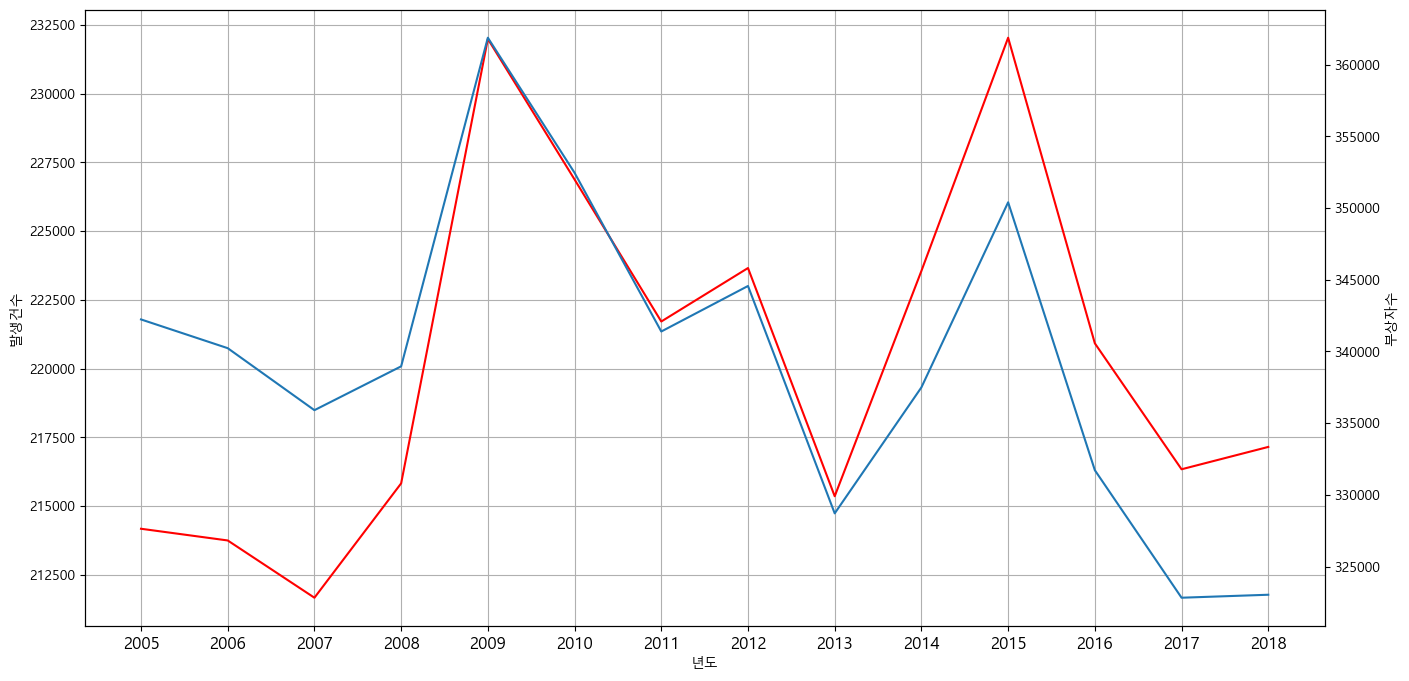

In [23]:
fig, ax1 = plt.subplots(1,1, figsize=(16,8)) # 그래프 시작
ax2 = ax1.twinx()                   # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
df['발생건수'].plot(ax=ax1, color='red')
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수')
ax1.grid()

# x축 좌표 위의 텍스트 처리
start = min(df.index)
end = max(df.index)
ax1.set_xticks(list(range(start, end+1)))
ax1.set_xticklabels(df.index, fontsize=12, color='#000000')

# ax2에 그래프 그리기
df['부상자수'].plot(ax=ax2)
ax2.set_ylabel('부상자수')
plt.show()
plt.close()